In [1]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Dense, Dropout, Flatten,Layer,BatchNormalization,Activation
from tensorflow.keras import Sequential
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import pandas as pd
from sklearn.metrics import ConfusionMatrixDisplay
from keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Conv2D, MaxPooling2D,GlobalAvgPool2D
import keras

In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
print(len(x_train))
print(len(y_train))
print(len(x_test))
print(len(y_test))

60000
60000
10000
10000


In [4]:
x_train[100].shape

(28, 28)

In [5]:
y_train[100]

8

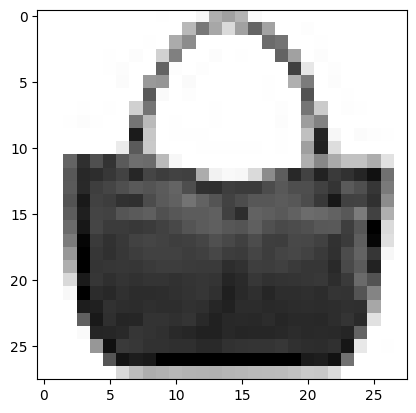

In [6]:
plt.imshow(x_train[100], cmap='Greys')

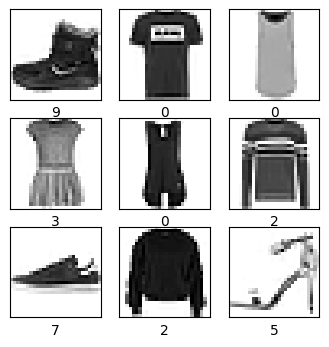

In [7]:
plt.figure(figsize=(4,4))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(y_train[i])
plt.show()

In [8]:
y_train = to_categorical(y_train,10)
y_test  = to_categorical(y_test,10)

![](https://miro.medium.com/v2/resize:fit:720/format:webp/1*hulTsO-BPGXn5nXnvVXQMA.png)

![](https://drek4537l1klr.cloudfront.net/ganegedara/v-6/Figures/04_13.png)

[CNN](https://poloclub.github.io/cnn-explainer/)

In [9]:
Lemodel = Sequential()
Lemodel.add(Conv2D(filters=32, kernel_size=(5,5), padding='same', activation='relu', input_shape=(28, 28, 1)))
Lemodel.add(MaxPooling2D(strides=2))
Lemodel.add(Conv2D(filters=48, kernel_size=(5,5), padding='valid', activation='relu'))
Lemodel.add(MaxPooling2D(strides=2))
Lemodel.add(Flatten())
Lemodel.add(Dense(128, activation='relu'))
Lemodel.add(Dense(32, activation='relu'))
Lemodel.add(Dense(10, activation='softmax'))
Lemodel.compile(loss="categorical_crossentropy",
              optimizer='adam',
              metrics=["accuracy"])
Lemodel.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 28, 28, 32)          │             832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 10, 10, 48)          │          38,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 48)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1200)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         153,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           4,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 197,466 (771.35 KB)

 Trainable params: 197,466 (771.35 KB)

 Non-trainable params: 0 (0.00 B)

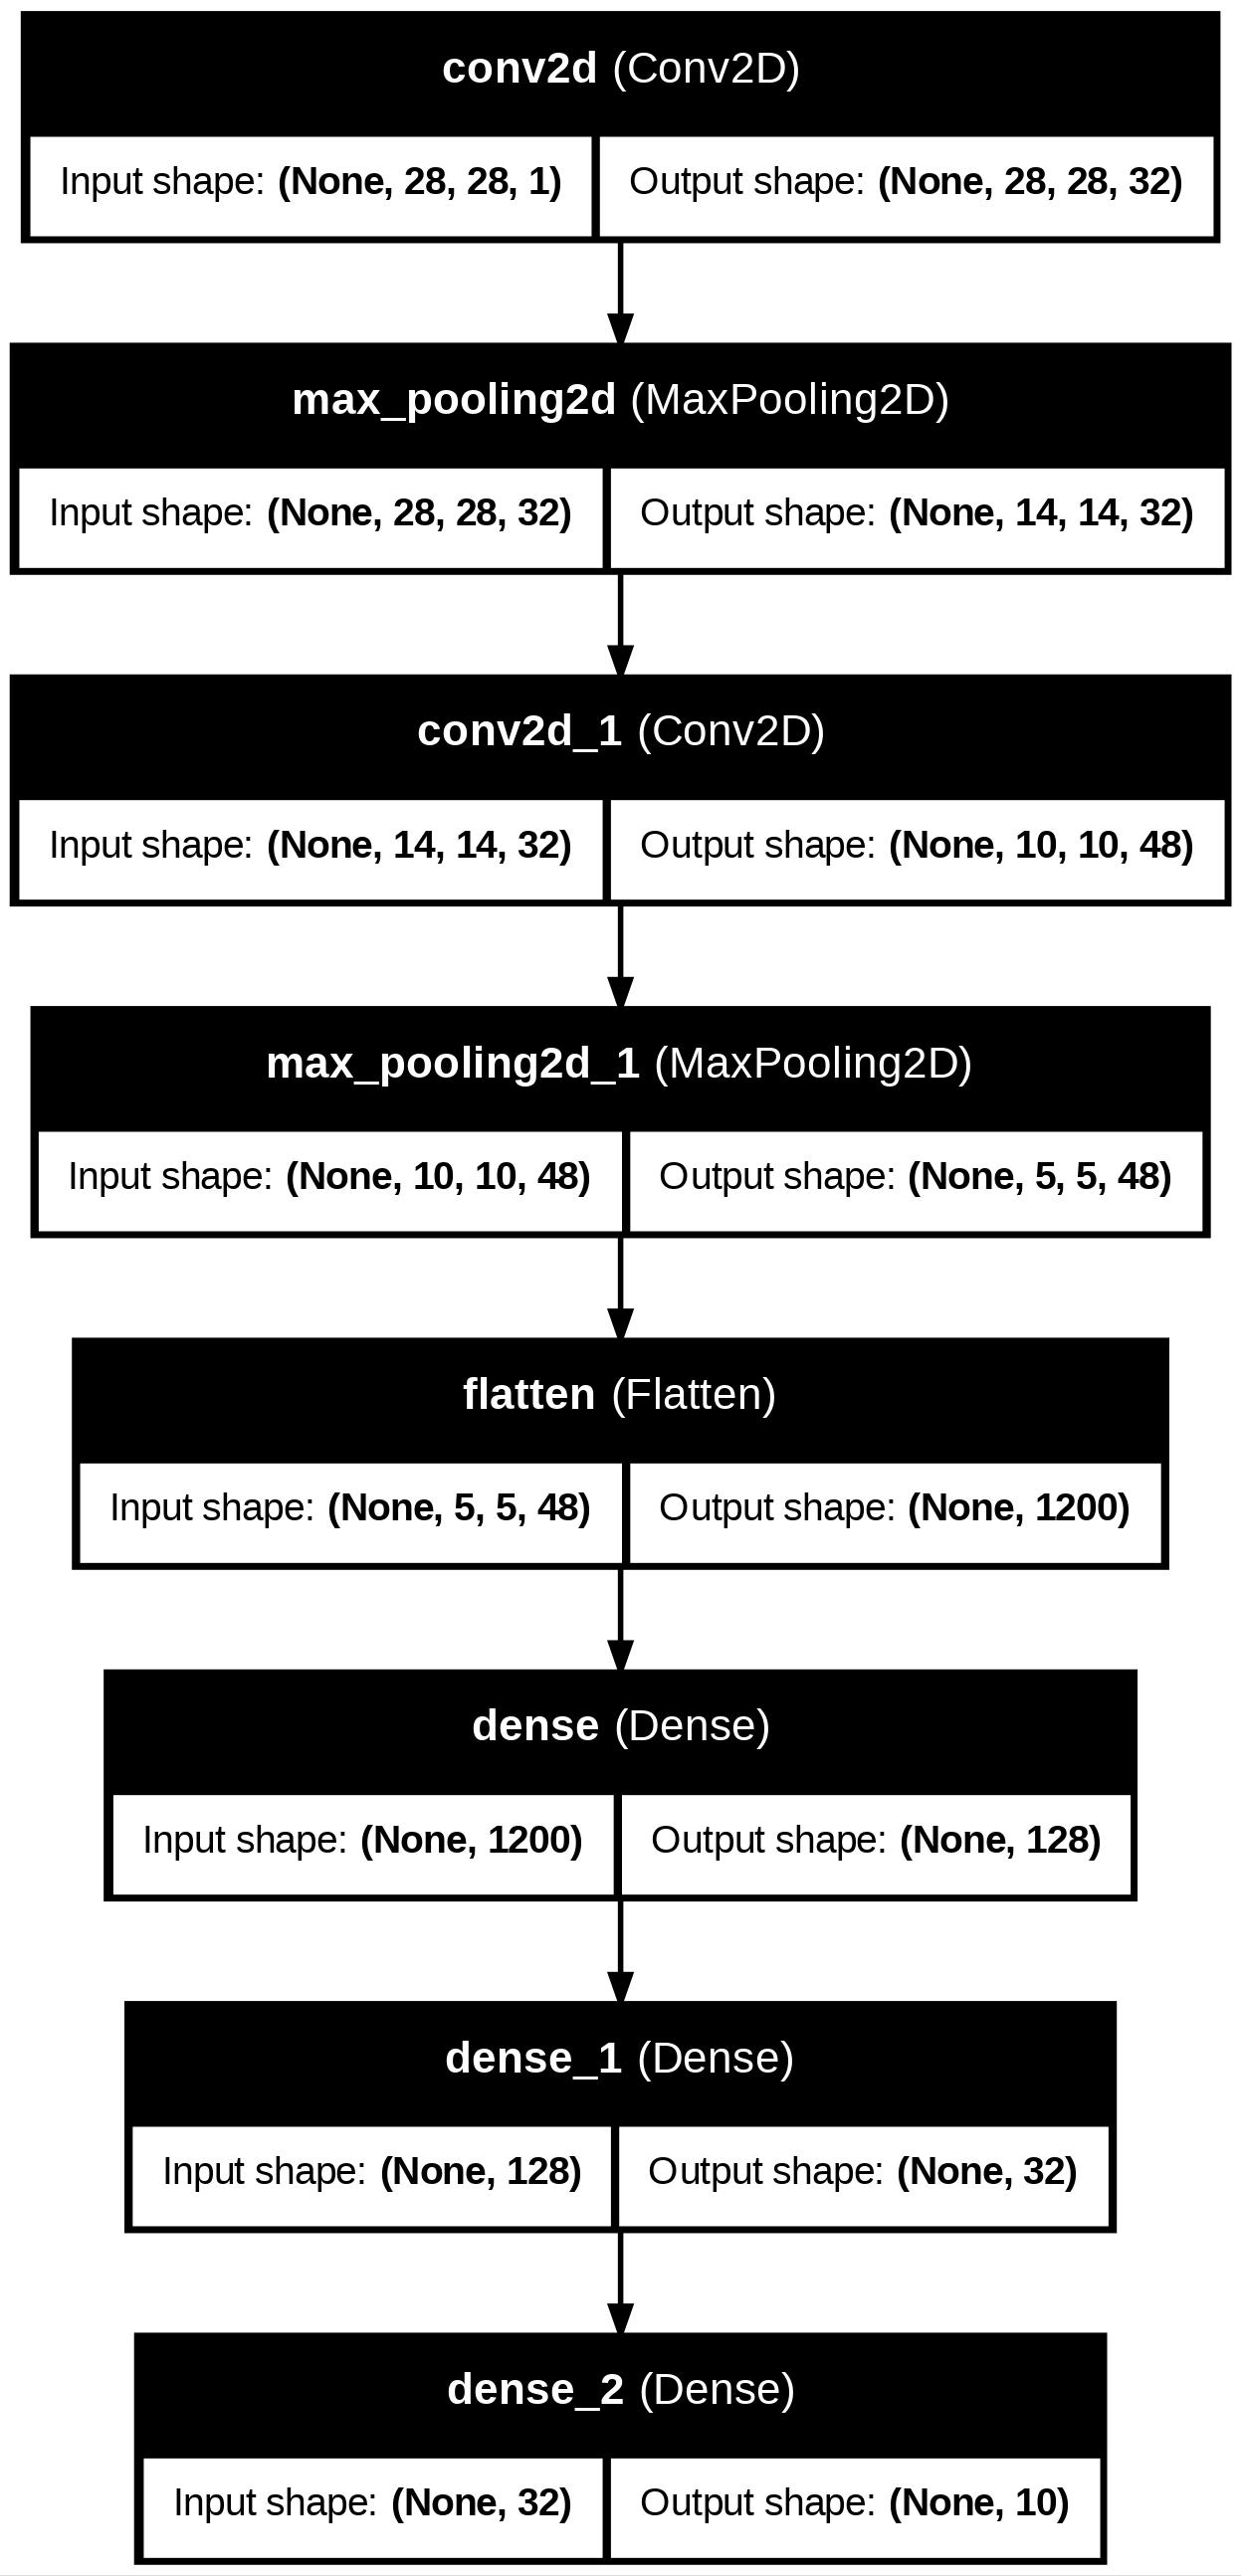

In [10]:
from tensorflow.keras.utils import plot_model
plot_model (Lemodel, to_file = 'Lemodel.jpg', show_shapes = True, show_layer_names = True)

In [11]:
# 進行訓練
history = Lemodel.fit(x_train,y_train,
                      epochs=20,              # 訓練次數
                      batch_size=32,
                      verbose=1,                  # 輸出訓練狀況
                      validation_data=(x_test,y_test))# 驗證資料

Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 3ms/step - accuracy: 0.5636 - loss: 2.0244 - val_accuracy: 0.8437 - val_loss: 0.4360
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 3ms/step - accuracy: 0.8753 - loss: 0.3398 - val_accuracy: 0.8805 - val_loss: 0.3302
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8921 - loss: 0.2917 - val_accuracy: 0.8893 - val_loss: 0.3084
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9022 - loss: 0.2673 - val_accuracy: 0.8918 - val_loss: 0.3071
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.9075 - loss: 0.2533 - val_accuracy: 0.9014 - val_loss: 0.2880
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9159 - loss: 0.2226 - val_accuracy: 0.8906 - val_loss: 0.3113
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9204 - loss: 0.2166 - val_accuracy: 0.9018 - val_loss: 0.2845
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9269 - loss: 0.19

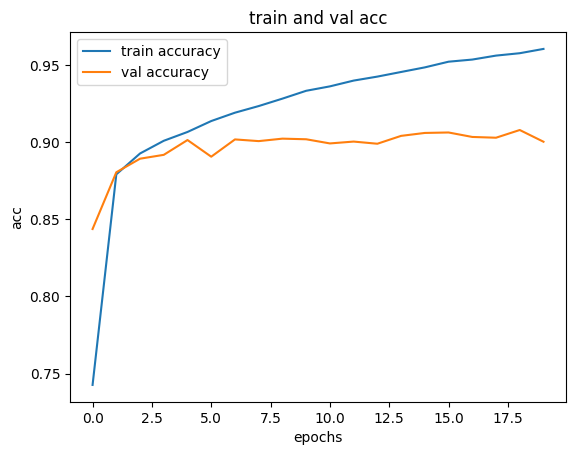

In [12]:
plt.plot(history.history['accuracy'] , label='train accuracy')
plt.plot(history.history['val_accuracy'] , label = 'val accuracy')
plt.title('train and val acc')
plt.xlabel('epochs')
plt.ylabel('acc')
plt.legend()
plt.show()

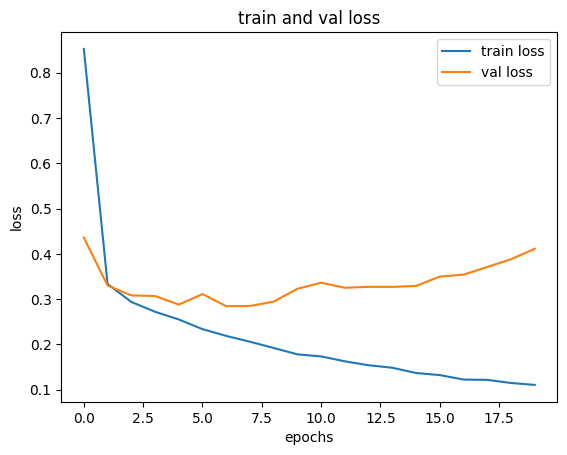

In [13]:
plt.plot(history.history['loss'] , label='train loss')
plt.plot(history.history['val_loss'] , label = 'val loss')
plt.title('train and val loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [14]:
label= np.argmax(y_test,axis=1)
pred = np.argmax(Lemodel.predict(x_test), axis=1)
print(accuracy_score(label, pred)*100,"%")
labels = ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
90.03 %


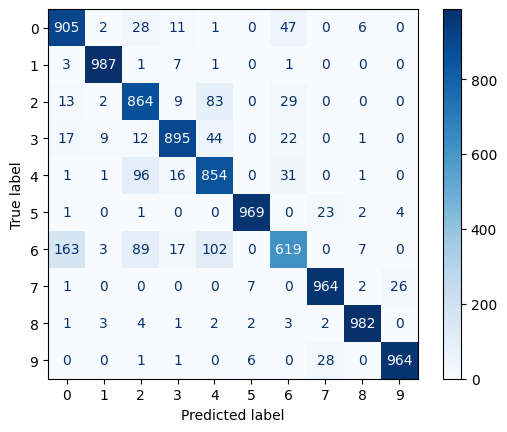

In [15]:
cm = confusion_matrix(label, pred)
display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
display.plot(
    include_values=True,
    cmap="Blues",
    ax=None,
    xticks_rotation="horizontal",
    #values_format=".2%",
)
plt.show()

In [16]:
#建立資料可視化函數
def plot_image(i, predictions_array, true_label, img):
    true_label, img = true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    true_label1 = np.argmax(true_label)
    if predicted_label == true_label1:
        color = 'green'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(predicted_label,
                                         100*np.max(predictions_array),
                                         np.argmax(true_label),
                                         color=color))

def plot_value_array(i, predictions_array, true_label):
    true_label = true_label[i]
    true_label1 = np.argmax(true_label)
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label1].set_color('green')

In [17]:
predictions=Lemodel.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


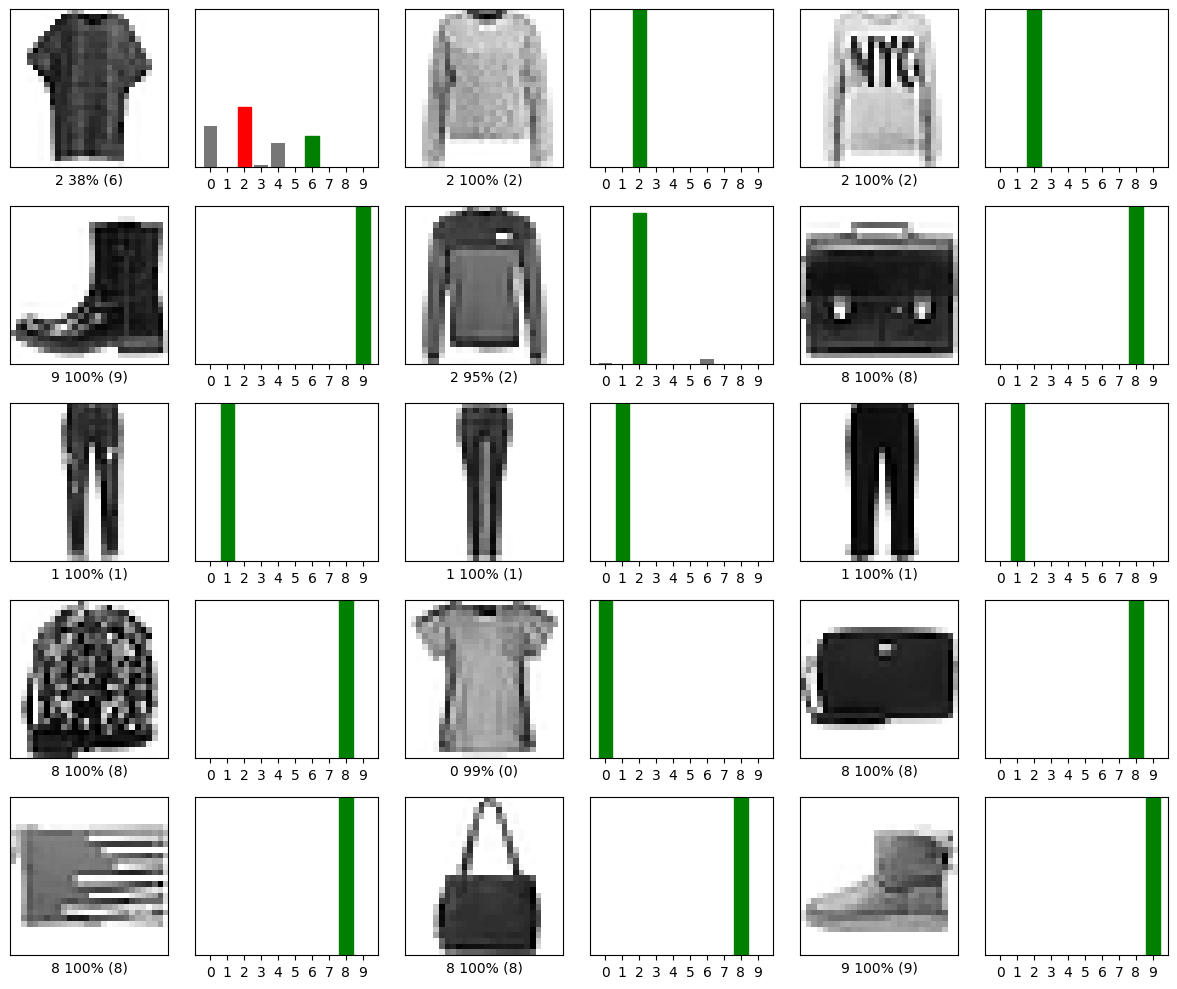

In [18]:
import random
#驗證模型
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  k = random.randint(1, 10000)
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(k, predictions[k], y_test, x_test.reshape(10000, 28,28))
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(k, predictions[k], y_test)
plt.tight_layout()
plt.show()

![](https://miro.medium.com/v2/resize:fit:4800/format:webp/1*0dsWFuc0pDmcAmHJUh7wqg.png)

![](https://www.pinecone.io/_next/image/?url=https%3A%2F%2Fcdn.sanity.io%2Fimages%2Fvr8gru94%2Fproduction%2F511d51bd1d1ec3b7155250bf7e53cfa6cb52f215-1339x503.png&w=1920&q=75)

In [19]:
# Alexnet
Almodel = Sequential()
#第一層卷積網路，使用96個卷積核，大小為11x11步長為4， 要求輸入的圖片為28x28， 3個通道，不加邊，啟用函式使用relu
Almodel.add(Conv2D(96, (11, 11), strides=(1, 1), input_shape=(28, 28, 1), padding='same', activation='relu',
                 kernel_initializer='uniform'))
# 池化層
Almodel.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))
# 第二層加邊使用256個5x5的卷積核，加邊，啟用函式為relu
Almodel.add(Conv2D(256, (5, 5), strides=(1, 1), padding='same', activation='relu', kernel_initializer='uniform'))
#使用池化層，步長為2
Almodel.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))
# 第三層卷積，大小為3x3的卷積核使用384個
Almodel.add(Conv2D(384, (3, 3), strides=(1, 1), padding='same', activation='relu', kernel_initializer='uniform'))
# 第四層卷積,同第三層
Almodel.add(Conv2D(384, (3, 3), strides=(1, 1), padding='same', activation='relu', kernel_initializer='uniform'))
# 第五層卷積使用的卷積核為256個，其他同上
Almodel.add(Conv2D(256, (3, 3), strides=(1, 1), padding='same', activation='relu', kernel_initializer='uniform'))
Almodel.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))

Almodel.add(Flatten())
Almodel.add(Dense(1024, activation='relu'))
Almodel.add(Dropout(0.5))
Almodel.add(Dense(1024, activation='relu'))
Almodel.add(Dropout(0.5))
Almodel.add(Dense(10, activation='softmax'))
Almodel.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
Almodel.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 28, 28, 96)          │          11,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 13, 13, 96)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 13, 13, 256)         │         614,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 6, 6, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 6, 6, 384)           │         885,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 6, 6, 384)           │       1,327,488 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 6, 6, 256)           │         884,992 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 2, 2, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1024)                │       1,049,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1024)                │       1,049,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │          10,250 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,833,418 (22.25 MB)

 Trainable params: 5,833,418 (22.25 MB)

 Non-trainable params: 0 (0.00 B)

In [20]:
# 進行訓練
history = Almodel.fit(x_train,y_train,
                      epochs=20,              # 訓練次數
                      batch_size=32,
                      verbose=1,                  # 輸出訓練狀況
                      validation_data=(x_test,y_test))# 驗證資料

Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 36s 15ms/step - accuracy: 0.7033 - loss: 3.8886 - val_accuracy: 0.8394 - val_loss: 0.4452
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 27s 14ms/step - accuracy: 0.8467 - loss: 0.4356 - val_accuracy: 0.8290 - val_loss: 0.4632
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 14ms/step - accuracy: 0.8477 - loss: 0.4369 - val_accuracy: 0.8599 - val_loss: 0.3872
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 27s 14ms/step - accuracy: 0.8540 - loss: 0.4142 - val_accuracy: 0.8541 - val_loss: 0.4222
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 14ms/step - accuracy: 0.8574 - loss: 0.4087 - val_accuracy: 0.8409 - val_loss: 0.4710
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 14ms/step - accuracy: 0.8551 - loss: 0.4269 - val_accuracy: 0.8658 - val_loss: 0.3830
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 14ms/step - accuracy: 0.8646 - loss: 0.3920 - val_accuracy: 0.8663 - val_loss: 0.4284
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 14ms/step - accuracy: 0.8612 -